<a href="https://colab.research.google.com/github/danknielv17/Tarea_numerica_1/blob/main/Tarea_num%C3%A9rica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe Actividad Aplicada No.1 MA2001-5 Cálculo en Varias Variables

### Universidad de Chile
### Facultad de Ciencias Físicas y Matemáticas
### Departamento de Ingeniería Matemática
### Profesor(a): Claudio Muñoz
### Nombre estudiante: Daniel Valenzuela Martínez
### Fecha de Entrega: Viernes 14 de Abril a la medianoche
### Santiago, Chile

# Resumen


En el presente informe se detalla el entendimiento teórico y la posterior creación de una red neuronal artificial y el funcionamiento de ésta como la aplicación reiterada de cálculos de matrices y vectores en una función para ciertas dimensiones de un vector de entrada.

Para comenzar, se resuelven las principales dudas teóricas antes de realizar una red neuornal artificial, como el comprender que la realización de la red es una composición de funciones continuas; entender la representacion gráfica de una red neuronal y el comprender que toda realización de una función continua de un polionmio fijo es un polinomio.

Posteriormente se realizará como código en Python, una rutina para calcular la realización $R(Φ)$ de una red neuronal en un punto $x_0 ∈ R^{d0}$ dado y a su vez construir una rutina que permita generar $Φ$ aleatoriamente con valores nunca superiores en módulo a 1.

Para luego, continuar con la representación gráfica y algebráica de la red neuronal que se obtendría si $d_0 = 2, L = 1$ y $d_f = 1$, $d_1$ = 2 (dos nodos en la capa oculta). Para así graficar el resultado de la realizacion de la red con $σ_1$ y $σ_2$ en el intervalo $x_0 ∈ [−1, 1] × [−1, 1]$ y valores de $Φ$ aleatorios.

Para finalmente, investigar el comportamiento de la realizacion resultante si ahora $d_1 = 3, d_1 = 5 y d_1 = 10$, preservando en cada paso siguiente los valores anteriores de pesos y bias en las posiciones repetidas, utilizando la función $σ_2$ para los cálculos. Para finalmente observar el comportamiento en un gráfico.  

# Introducción
Una red neuronal artificial es un modelo matemático inspirado en la estructura y funcionamiento de un cerebro humano.

Consiste en una serie de capas de neuronas interconectadas que procesan la información de entrada y producen una salida. Cada neurona es una unidad de procesamiento que toma como entrada un conjunto de valores, realiza una operación matemática y produce una salida.

Para poder desarrollar una red neuronal artificial, es necesario igualmente, entenderla como la aplicación reiterada de cálculos matemáticos, siendo finalmente una función $R(Φ) : R^{d_0} → R^{d_f}$

Utilizando un programa en Python, a continuación se describe el como realizar una red neuronal artificial, primero que nada entendiendo su representación algebráica, entendiendo las caracteristicas de las funciones y elementos que componen los cálculos de la red, para posteriormente, en un código, comprender como generar el arreglo que recibe la red neuronal que elementos lo componen. Y así generar una red neuronal que reciba cualquier vector $x_0$

# Planteamiento

Redes Neuronales Artificiales 1. En lo que sigue definiremos los siguientes conceptos:
1. Sean $d_0$ $∈ N$\{0} y $x_0 ∈ R d_0$ un vector de entrada o input.
2. $L ∈ N$ el llamado número de capas ocultas (hidden layers) de la red (puede ser 0).
3. Si $L ≥ 1, d1, d2, . . . , dL$ ∈ N\{0} las dimensiones de las capas ocultas, que serán vectores en $R^{d_1}$, $R^{d_2}$, etc.
4. Una ultima dimensión $d_{L+1} =: d_f$ de salida o output para un vector $x_f$ en $R^{d_f}$ .
5. $b_1 ∈ R^{d_1} , b_2 ∈ R^{d_2} , . . ., b_L ∈ R^{d_L}$ y $b_{L+1} ∈ R^{d_{L+1}} = R^{d_f}$ vectores de sesgo o bias, uno por cada capa oculta y uno final para la salida.
6. $W_1 ∈ R^{d_1×d_0}$ matriz a valores reales con $d_1$ filas y $d_0$ columnas; $W_2 ∈ R^{d_2×d_1}$ matriz a valores reales con $d_2$ filas y $d_1$ columnas; y así sucesivamente hasta $W_{L+1} ∈ R^{d_{L+1}×d_L}$. Estas matrices se llaman pesos de la red.
7. Una función $σ : R → R$ continua llamada función de activación.
Sea $Φ := (W_1, W_2, . . . , W_{L+1}, b_1, . . . , b_{L+1})$ el arreglo que engloba a todos los parámetros libres (exceptuando las dimensiones y la función de activación $σ$). A $Φ$ se le denomina red neural artificial (RNA en corto).

La realización $R(Φ)$ de una red neuronal $Φ$ corresponde a la siguiente aplicación reiterada: para $x_0 ∈ R^{d_0}$ input, se desea encontrar $x_f ∈ R^{d_f}$ output como sigue:

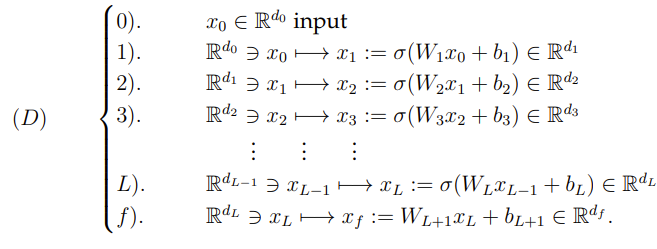

Notar de inmediato las siguientes aclaraciones:
1. La ultima aplicación $f$) no usa $σ$.

2. $σ(W x + b)$ para $W ∈ R^{{d_1}×{d_0}}$ y $b ∈ R d1$ se entiende actuando coordenada a coordenada como sigue:

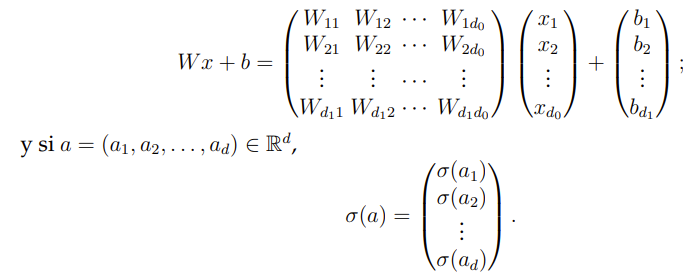

Resumiendo, la realizacion de la red es la función $R(Φ) : R^{d_0} −→ R^{d_f}$ dada por

$R(Φ)(x0) := W_{L+1} (σ (W_L (· · ·(σ (W_1x_0 + b_1))· · ·) + b_L)) + b_{L+1}.$


# Desarrollo

## Parte 1 Descripción teórica

A continuación se proceden a resolver las preguntas propuestas

### Parte 1 (a)

Muestre que $\mathcal R(\Phi)$ siempre define una función continua de $\mathbb{R}^{d_0}$ a valores en $\mathbb{R}^{d_f}$.

**Demostración:**

Para demostrar que $R(Φ)$ siempre define una función continua desde valores de $R^{d_0}$ a valores en $R^{d_f}$ basta con ver que la aplicación de $σ(W_L x_{L-1}+b_L)$ y $W_{L+1} x_L+b_{L+1}$ son continuas para luego por álgebra y composición de continuas, $R(Φ)$ es continua.

Primero que nada, ver que en $R^{d_0}$ tenemos el vector $x_0$, el cual se encuentra bien definido.
Por otro lado, tenemos que, por enunciado, $σ$ es continua de $R→R$ y dado que $a=(a_1,a_2,… ,a_d)$ en $R^d$ así que $σ(a)$ es continua en todo $R^d$.

Luego, $σ(W_L x_{L-1}+b_L)$ genera un polinomio continuo para cada coordenada, de la forma $W_L x_{L-1}+b_L$, notamos además que, para cada elemento de la matriz $W$ por $x_1+b_1$ hasta $x_{d_0}+b_{d_1}$ es continua.

De igual manera, $W_{L+1} x_L+b_{L+1}$ es continua para cada elemento de la matriz, multiplicándose por $x_1+b_1$ hasta  $x_{d_0} + b_{d_1}$.


Finalmente, por álgebra y composición de funciones continuas $R(Φ)$ es continua.

### Parte 1 (b)

Encuentre y grafique la representación gráfica en términos de flechas y nodos de las operaciones descritas en (D).

Sea la representación gráfica en términos de flechas y nodos de las operaciones descritas

Figura 1: representación gráfica en términos de flechas y nodos las operaciones de una red neuronal de dimensión $d_0$ hasta $d_f$

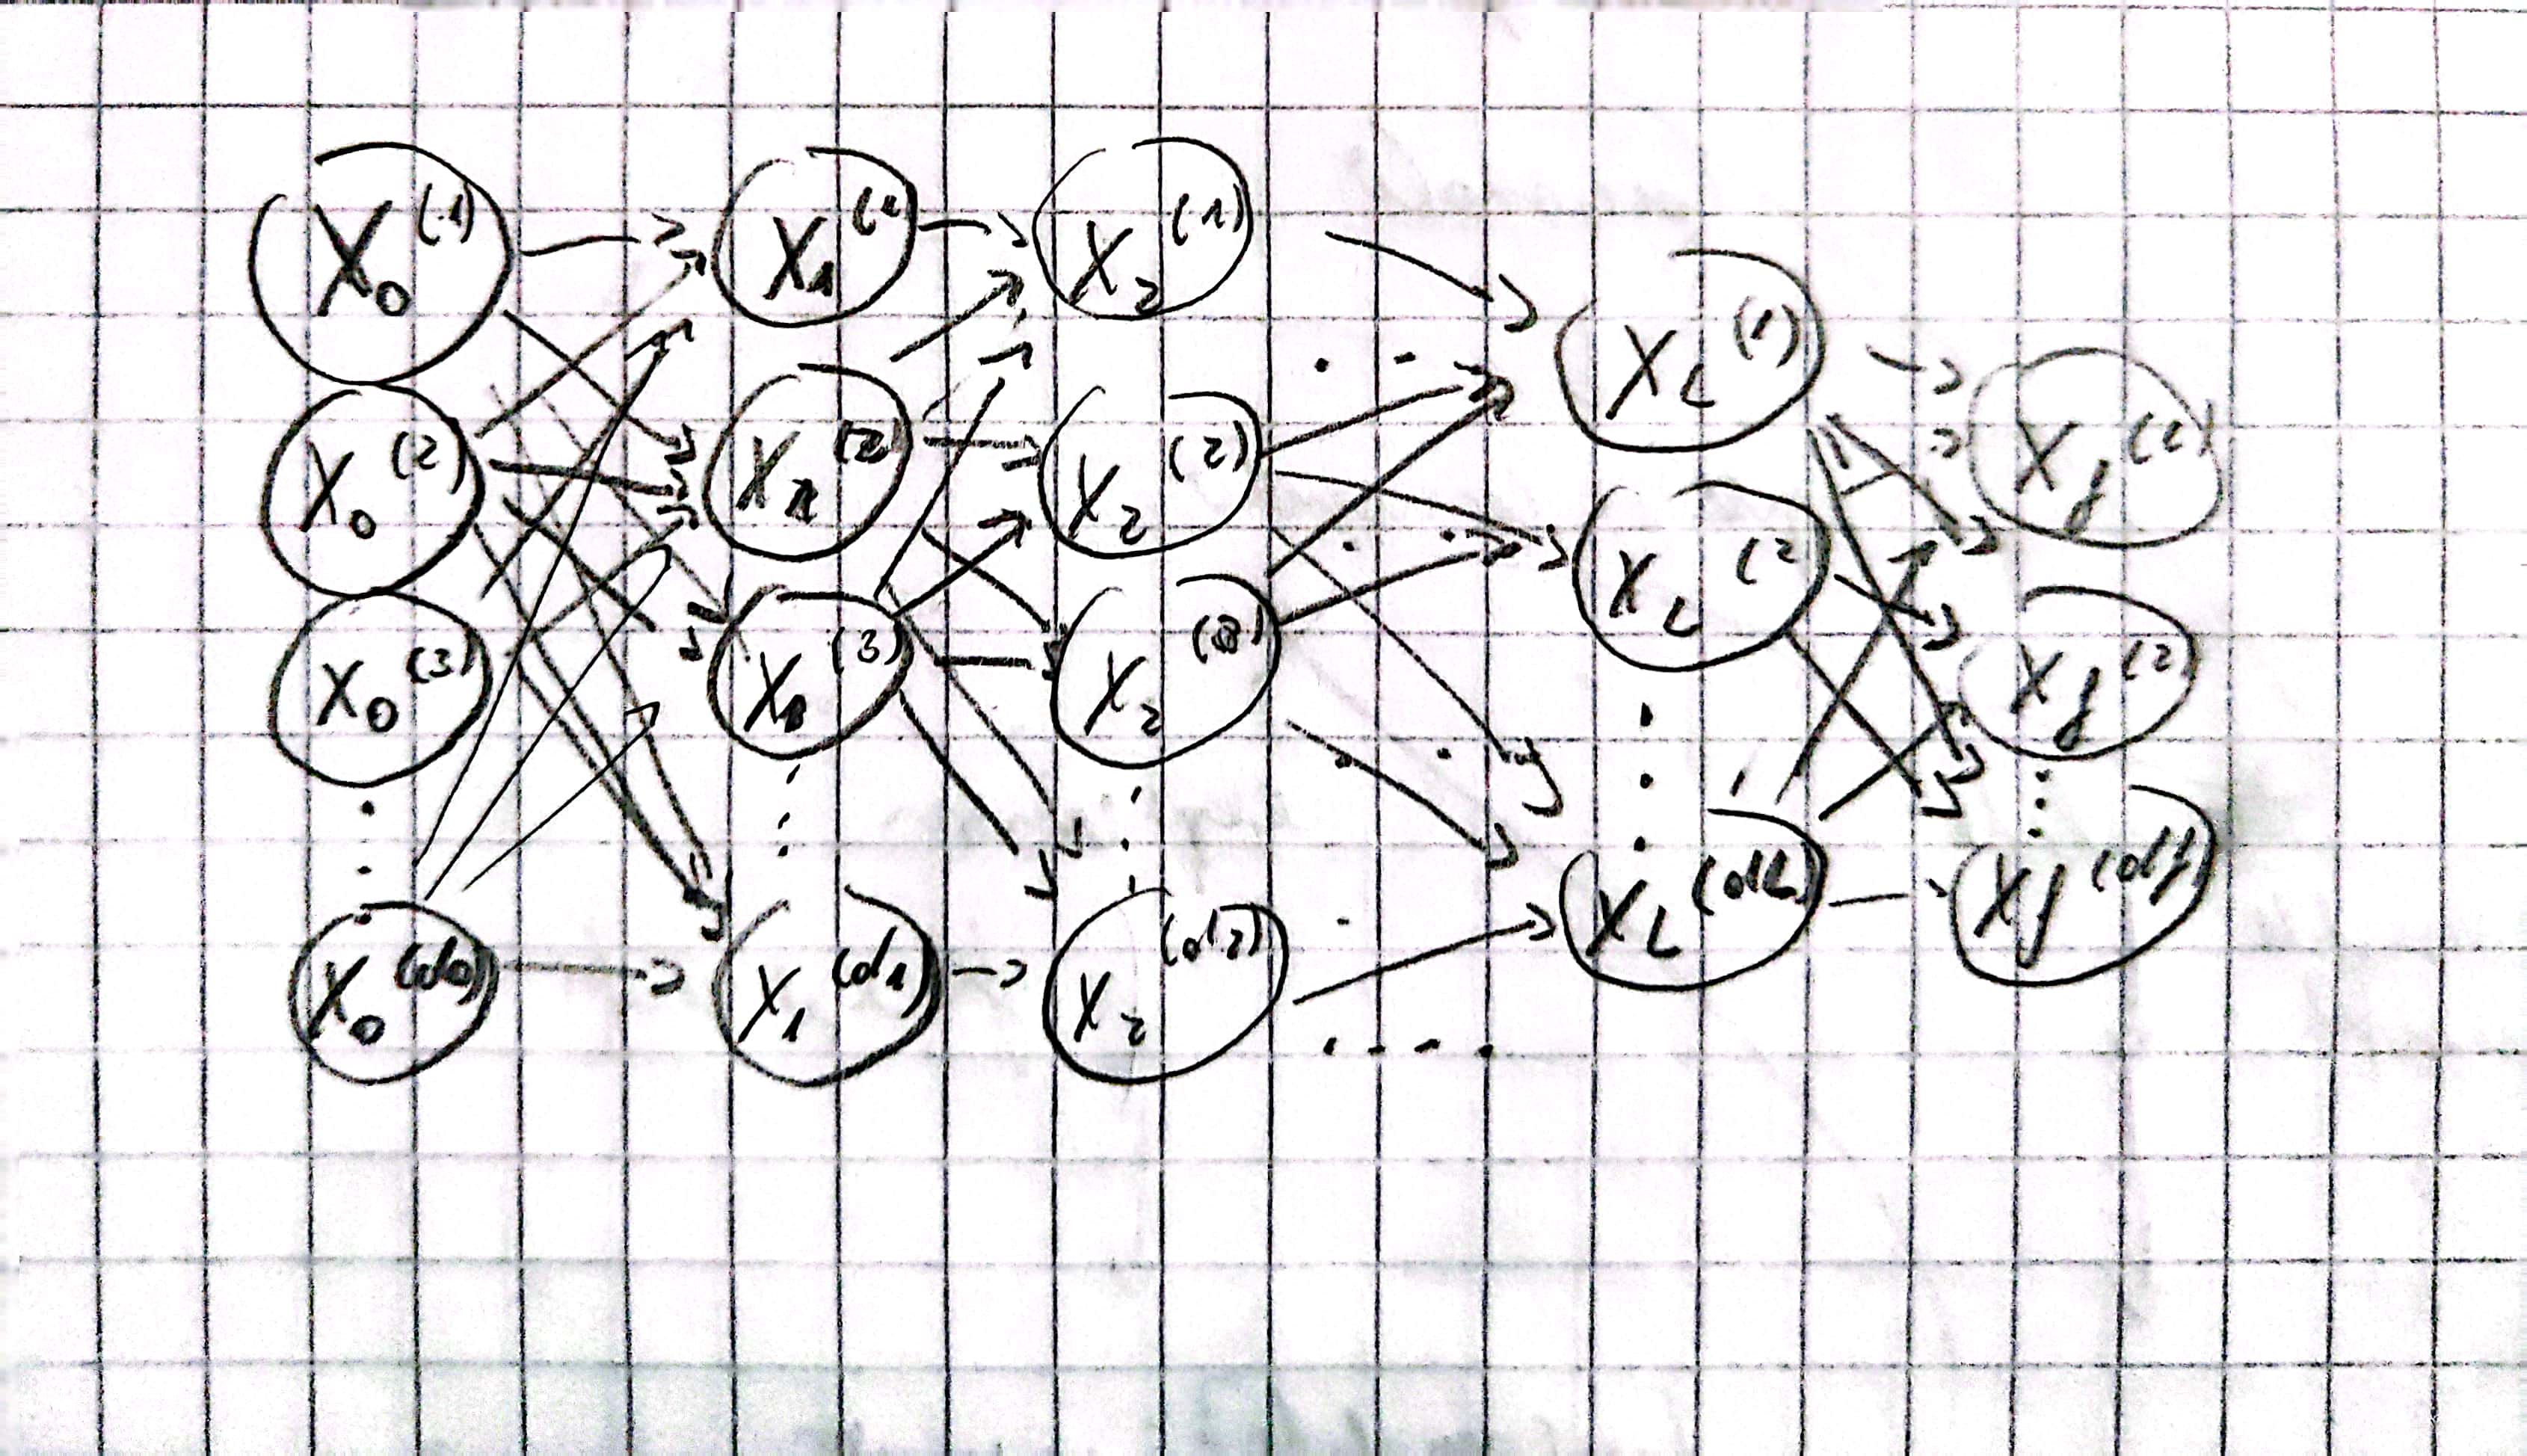

### Parte 1 (c)

Muestre que si $\sigma: \mathbb{R} \to \mathbb{R}$ es un polinomio fijo, entonces toda realización de una red neuronal terminará siendo un polinomio de las variables del vector $x_0$. Qué sucede si $\sigma$ es una función lineal afín?

**Demostración:**

Si $σ∶ R→R$ es un polinomio fijo, entonces toda realización de una red neuronal terminará siendo un polinomio de las variables del vector $x_0$.

Si $σ$ es un polinomio fijo, este puede escribirse de la forma:

$σ = a_n x^n+ a_{n-1} x^{n-1}+⋯+a_1 x+a_0$

Donde tenemos la constante $a_n$

Entonces, las aplicaciones de la red neuronal serán de la forma

$x_1 =  σ(W_1 x_0+b_1) = a_n(W_1 x_0+b_1)^n+ a_{n-1}(W_1 x_0+b_1 )^{n-1}+⋯+a_1 (W_1 x_0+b_1)+a_0$

$x_2=  σ(W_2 x_1+b_2) =a_n (W_2 x_1+b_2 )^n+ a_{n-1}(W_2 x_1+b_2 )^{n-1}+⋯+a_1 (W_2 x_1+b_2)+a_0$

Repitiendo la aplicación hasta llegar a

$x_L=  σ(W_L x_{L-1}+b_L) = a_n(W_L x_{L-1}+b_L)^n+ a_{n-1}(W_L x_{L-1}+b_L)^{n-1}+⋯+a_1(W_L x_{L-1}+b_L)+a_0$

Mientras que $x_f$ se mantiene ya que no usa $σ$.


Lo que demuestra que, existe una composición de polinomios fijos en cada capa oculta, así, si $σ∶ R→R$ es un polinomio fijo, entonces cada aplicación de la red neuronal es un polinomio de las variables del vector $x_0$, mientras que la última aplicación de salida de la red es una transformación que puede interpretarse como un polinomio en $x_0$.

Por otro lado, si $σ$ fuese una función afin, es decir una función de la forma $mx+c$, el proceso es análogo, y aplicación de la red neuronal será una función a fin, siendo cada capa oculta de la forma $m(W_1 x_0+b_1)+c$ hasta $(W_L x_{L-1}+b_L)+c$.

## Parte 2: Descripción gráfica

En esta parte, procederan a desarrollar y explicarse los comandos necesarios para poder realizar el codigo de la realización de la red neuronal en Python

In [ ]:
# Se importan las librerias necesarias para calcular y graficar respectivamente
import numpy as np
import matplotlib.pyplot as plt

### Parte 2 (a)

Implemente en Python una rutina para calcular la realización $\mathcal R(\Phi)$ de una red neuronal en un punto $x_0 \in \mathbb{R}^{d_0}$ dado.

Esta rutina debe recibir $\sigma, d_0, d_1,d_2, \ldots, d_f$ y la red $\Phi:=(W_1,W_2,\ldots, W_{L+1}, b_1,\ldots,b_{L+1})$.

Además construya una rutina que permita generar $\Phi$ aleatoriamente con valores **nunca superiores** en módulo a 1.

Sea el código para la realización:

In [ ]:
# Sea RPhi la realización de la red neuronal
# d tiene como componente 0 a d0, como última componente df, y entremedio d1,...,dL. Vector de tamaño L+2
# Phi es un vector de L+1 componentes, donde cada componente es (Wl,bl)
# Wl está en IR^dl x IR^{d{l-1}}
# bl está en IR^dl
# sigma es la función de activación
def RPhi(x0,d,Phi,sigma):
  l = 0
  # Sea L el largo de Phi - 1 (es decir L+1 componentes - 1)
  L = len(Phi)-1
  xl = x0
  # Mientras la dimension sea menor que la de salida en la red
  while l in range(L):
    # Sea xl la salida de la capa l+1 como la activación de la matriz de pesos por la entrada más el sesgo
    xl = sigma(np.matmul(Phi[l][0],xl) + (Phi[l][1]))
    l =+1
  # Se calcula la última capa
  xl = np.matmul(Phi[L][0], xl) + (Phi[L][1])
  return xl

In [ ]:
#Función para generar peso W_i en IR^i x IR^{i-1}
def get_weights(di,dj):
    Wl = np.random.uniform(size=(dj,di), low=-1, high=1) #Matriz de tamaño dj x di
    return Wl

# Función para generar sesgo b_i en IR^i
def get_biases(di):
    bl = np.random.uniform(size=(di),low=-1, high=1) #Vector de tamaño dj
    return bl

# Funcion que genera Phi para cualquier d de la forma d = [d0,d1,...,dL,df]
def generaphi(d, L):
  # Se inicia Phi como lista
  Phi = []
  for l in range(1, L+2):
    # Se generan los pesos y sesgos para un d dado
    wb = [get_weights(d[l-1],d[l]), get_biases(d[l])]
    # Se actualiza la lista Phi uniendo los sesgos y pesos
    Phi.append(wb)
  return Phi

### Parte 2 (b)

En lo que sigue suponga que

$d_0=2, \quad L=1 \quad  \hbox{y} \quad d_f=1,$

es decir, $\mathcal R(\Phi)$ irá de $\mathbb{R}^{2}$ a valores en $\mathbb{R}$ con una capa oculta de dimensión $d_1$ no fija aún.

Represente gráfica y algebraicamente la red neuronal que se obtendría si $d_1=2$ (dos nodos en la capa oculta). Grafique el resultado de la realización de la red  con $\sigma_1$ y $\sigma_2$ el intervalo  $x_0 \in [-1,1] \times [-1,1]$ y valores de $\Phi$ aleatorios. Compare sus resultados.

Sea la representación algebráica de la realización:

$R(Φ)(x_0)=W_2(σ(W_1x_0+b_1))+b_2$
​


Sea la representación gráfica de la realización, el gráfico:

Figura 2: Representación gráfica en termino de flechas y nodos para una realización con los valores $d_0 = 2, d_1 = 2, L = 1$ y $d_f = 1$

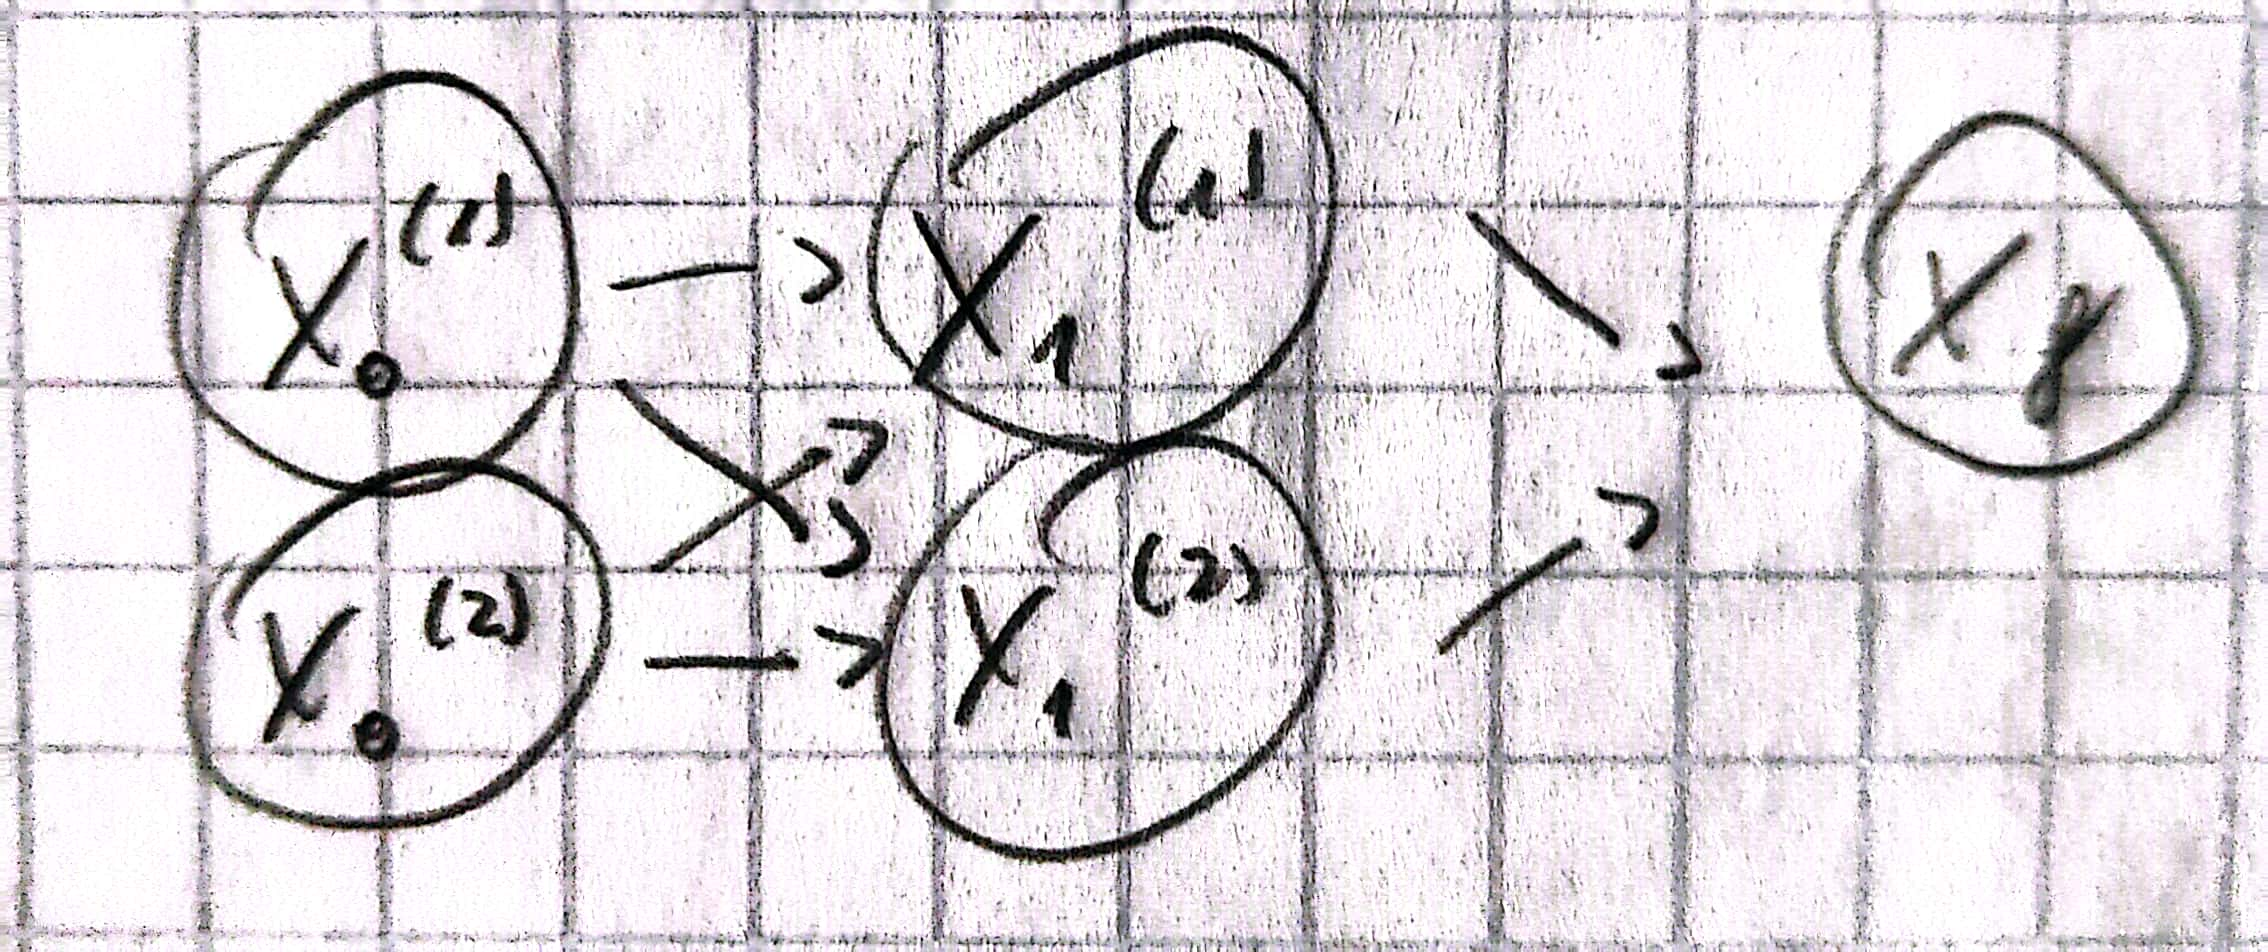

Sea el código para graficar el resultado de la realización de la red:

In [ ]:
# Para utilizar las funciones anteriores, sea d la lista en donde
# d0 = 2 y df = 1
# Tambien d1 = 2
d = np.array([2,2,1])
L = 1

In [ ]:
# Sigma1
def ReLu(x):
    Relu = np.maximum(x,0)
    return Relu

# Sigma2
def Sigmoid(x):
    Sig = 1/(1 + np.exp(-x))
    return Sig

In [ ]:
# Se define Phi
Phi = generaphi(d,L)

In [ ]:
# Grillas 2D en (-1,1)
x = np.linspace(-1,1,11)
y = np.linspace(-1,1,11)
#se utiliza la función np.meshgrid, que genera una grilla en R2 de tamaño 11x11
XX, YY = np.meshgrid(x,y)

In [ ]:
# Se calcula la grilla en Z para el sigma ReLu
Z1 = np.zeros((len(x),len(y)))
# Se calcula cualquier punto de la grilla con un for en i,j y se obtiene el vector xij = [XX[i,j],YY[i,j]]
for i in range(len(x)):
  for j in range(len(y)):
    xij = np.array([XX[i,j], YY[i,j]])
    # Se calcula la realización para Z y ReLu
    RPhi1 = RPhi(xij,d,Phi,ReLu)
    Z1[i,j] = RPhi1

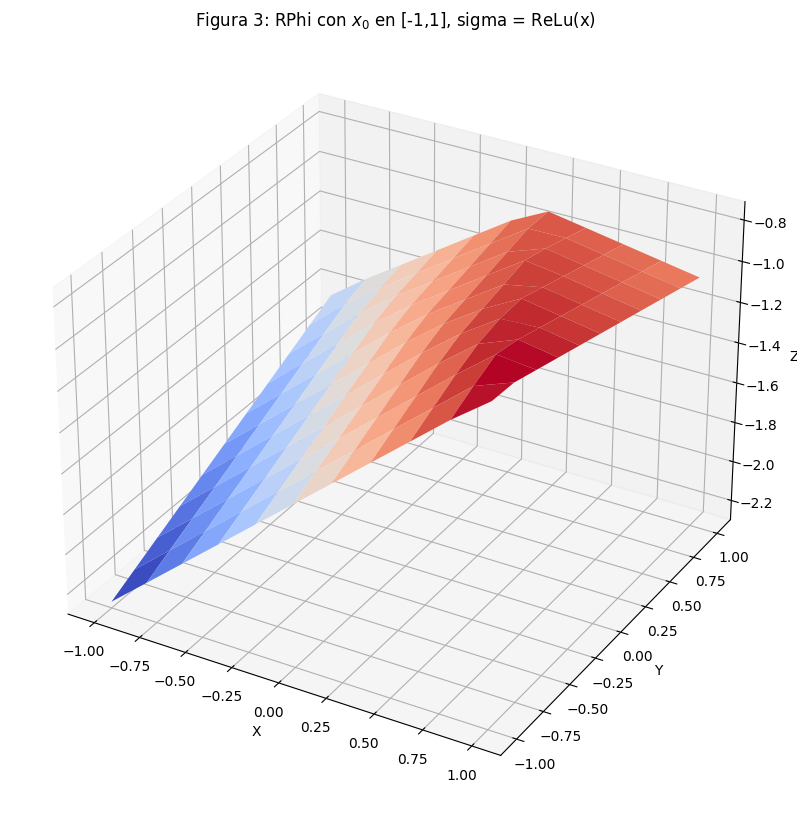

In [ ]:
# se genera el gráfico
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') # Necesario para graficar en 3d
ax.plot_surface(XX,YY,Z1, cmap='coolwarm') # plot_surface grafica grillas XX, YY vs f(XX,YY)
#cmap es el color del gráfico
ax.set_title("Figura 3: RPhi con $x_0$ en [-1,1], sigma = ReLu(x)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
# Se calcula la grilla en Z para el sigma Sigmoid
Z2 = np.zeros((len(x),len(y)))
# Se calcula cualquier punto de la grilla con un for en i,j y se obtiene el vector xij = [XX[i,j],YY[i,j]]
for i in range(len(x)):
  for j in range(len(y)):
    xij = np.array([XX[i,j], YY[i,j]])
    # Se calcula la realización para Z y Sigmoid
    RPhi2 = RPhi(xij,d,Phi,Sigmoid)
    Z2[i,j] = RPhi2

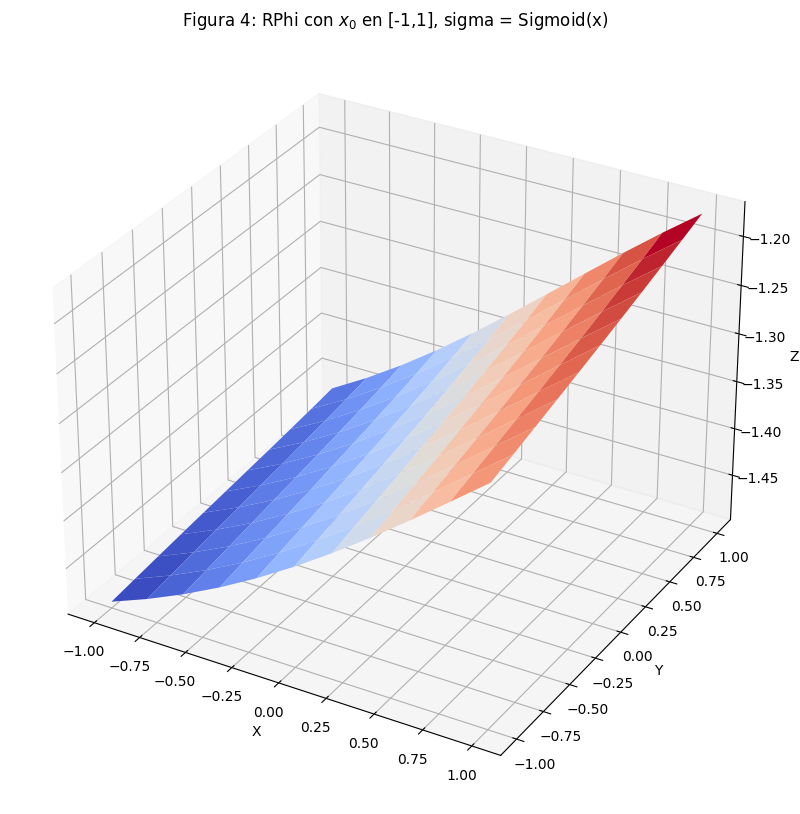

In [ ]:
# se genera el gráfico
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') # Necesario para graficar en 3d
ax.plot_surface(XX,YY,Z2, cmap='coolwarm') # plot_surface grafica grillas XX, YY vs f(XX,YY)
#cmap es el color del gráfico
ax.set_title("Figura 4: RPhi con $x_0$ en [-1,1], sigma = Sigmoid(x)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Parte 2 (c)

Investigue el comportamiento de la realización resultante si ahora $d_1=3$, $d_1=5$ y $d_1=10$, preservando en cada paso siguiente los valores anteriores de pesos y bias en las posiciones repetidas. Grafique. Utilize la función $\sigma_2$ para sus cálculos.

Los valores de Phi_3 tienen que estar contenidos en los valores de Phi_5, y estos a su vez en los de Phi_10. Para eso se crea la siguiente función que tiene por finalidad preservar los valores y agregarlos al siguiente Phi

In [ ]:
# Función para preservar los valores de los pesos y bias anteriores
# Sea f1 el primer Phi generado y f2 el siguiente Phi
# El siguiente Phi debe tener los valores de Phi
def preservar(f1,f2):
  # Se definen las bases y bias correspondientes a cada Phi
  w1_f1 = f1[0][0]
  b1_f1 = f1[0][1]
  w2_f1 = f1[1][0]
  w1_f2 = f2[0][0]
  b1_f2 = f2[0][1]
  w2_f2 = f2[1][0]
  # Se itera sobre el peso en Phi 1
  for i in range(0,(np.shape(w1_f1)[0])):
    for j in range(0,(np.shape(w1_f1))[1]):
      # Se actualiza el peso w1
      w1_f2[i,j] = w1_f1[i,j]
  # Se itera sobre el bias
  for i in range(0,(np.shape(b1_f1)[0])):
    # Se actualiza el bias
      b1_f2[i] = b1_f1[i]
  # Se itera sobre el peso en Phi 2
  for i in range(0,(np.shape(w2_f1)[0])):
    for j in range(0,(np.shape(w2_f1))[1]):
      # Se actualiza el peso w2
      w2_f2[i,j] = w2_f1[i,j]
  return f2

Sea $d_1$ = 3

Como $d_1$ = 3 es el primer $d_1$ a considerar, simplemente se genera un Phi con el valor indicado

In [ ]:
# Caso d1 = 3
d3 = np.array([2,3,1])
# Simplemente se genera Phi
Phi_3 = generaphi(d3,L)

In [ ]:
# Se calcula la grilla en Z para el sigma Sigmoid
Z3 = np.zeros((len(x),len(y)))
# Se calcula cualquier punto de la grilla con un for en i,j y se obtiene el vector xij = [XX[i,j],YY[i,j]]
for i in range(len(x)):
  for j in range(len(y)):
    xij = np.array([XX[i,j], YY[i,j]])
    RPhi3 = RPhi(xij,d3,Phi_3,Sigmoid)
    Z3[i,j] = RPhi3

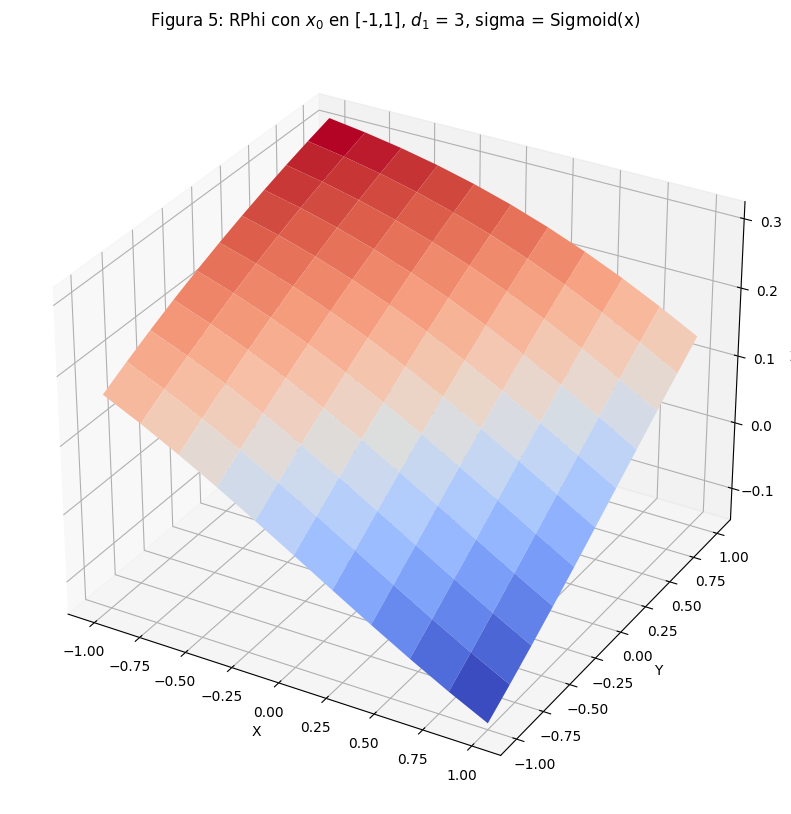

In [ ]:
# Se genera el gráfico
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') # Necesario para graficar en 3d
ax.plot_surface(XX,YY,Z3, cmap='coolwarm') # plot_surface grafica grillas XX, YY vs f(XX,YY)
#cmap es el color del gráfico
ax.set_title("Figura 5: RPhi con $x_0$ en [-1,1], $d_1$ = 3, sigma = Sigmoid(x)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Sea $d_1$ = 5

In [ ]:
# Caso d1 = 5
d5 = np.array([2,5,1])

Phi_5 = generaphi(d5,L)

In [ ]:
# Se itera sobre el largo de Phi_5
for i in range(0,len(Phi_5)):
  # Se actualiza Phi_5 con los valores de Phi_3
  Phi_5 = preservar(Phi_3, Phi_5)

In [ ]:
# Se calcula la grilla en Z para el sigma Sigmoid
Z5 = np.zeros((len(x),len(y)))
# Se calcula cualquier punto de la grilla con un for en i,j y se obtiene el vector xij = [XX[i,j],YY[i,j]]
for i in range(len(x)):
  for j in range(len(y)):
    xij = np.array([XX[i,j], YY[i,j]])
    RPhi5 = RPhi(xij,d5,Phi_5,Sigmoid)
    Z5[i,j] = RPhi5

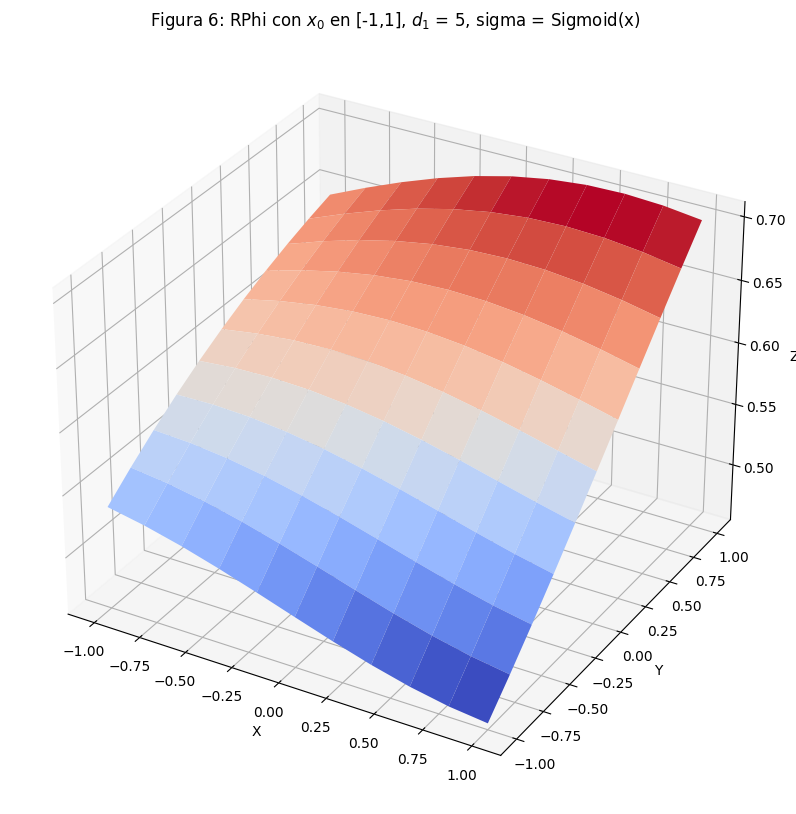

In [ ]:
# se genera el gráfico
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') # Necesario para graficar en 3d
ax.plot_surface(XX,YY,Z5, cmap='coolwarm') # plot_surface grafica grillas XX, YY vs f(XX,YY)
#cmap es el color del gráfico
ax.set_title("Figura 6: RPhi con $x_0$ en [-1,1], $d_1$ = 5, sigma = Sigmoid(x)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Sea $d_1$ = 10

In [ ]:
# Caso d1 = 10
d10 = np.array([2,10,1])

Phi_10 = generaphi(d10,L)

In [ ]:
# Se itera sobre el largo de Phi_10
for i in range(0,len(Phi_10)):
  # Se actualiza Phi_10 con los valores de Phi_5
  Phi_10 = preservar(Phi_5, Phi_10)

In [ ]:
# Se calcula la grilla en Z para el sigma Sigmoid
Z10 = np.zeros((len(x),len(y)))
# Se calcula cualquier punto de la grilla con un for en i,j y se obtiene el vector xij = [XX[i,j],YY[i,j]]
for i in range(len(x)):
  for j in range(len(y)):
    xij = np.array([XX[i,j], YY[i,j]])
    RPhi10 = RPhi(xij,d10,Phi_10,Sigmoid)
    Z10[i,j] = RPhi10

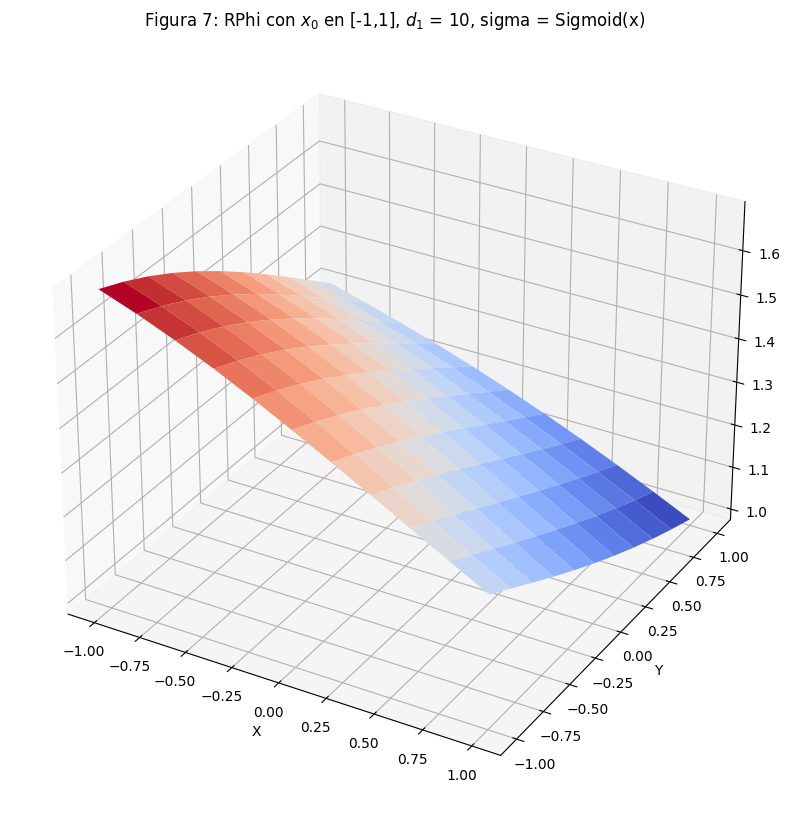

In [ ]:
# se genera el gráfico
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') # Necesario para graficar en 3d
ax.plot_surface(XX,YY,Z10, cmap='coolwarm') # plot_surface grafica grillas XX, YY vs f(XX,YY)
#cmap es el color del gráfico
ax.set_title("Figura 7: RPhi con $x_0$ en [-1,1], $d_1$ = 10, sigma = Sigmoid(x)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Conclusión

En conclusión, en primer lugar se solicita responder a las interrogantes como, si ¿RPhi es continua?, cuál es la representación gráfica de en términos de flechas y nodos de las aplicaciones reiteradas que caracterizan la red neuronal como también responder a que toda realización de una red neuronal terminará siendo un polinomio de las variables del vector $x_0$ si la función de activación es un polinomio fijo.

Para resolver a estas interrogantes, es necesario acudir a conocimientos previos, ya sea álgebra y composición de funciones continuas para la primera pregunta o composicion de polinomios en la tercera pregunta, y para la segunda, es necesario aprender nuevos conocimientos sobre una red neuronal y su funcionamiento. Siendo toda la parte 1 una introducción teórica para comprender una red neuronal y sus funciones. Para así llegar a la parte 2 a programar.

Para abarcar la parte 2 es nuevamente necesario entender el cómo funcionan las aplicaciones de la red, entender que las aplicaciones son iteraciones dentro de valores de L dimensiones para luego entregar el valor en un vector especifico, y a su vez, entender Phi como una aplicación que multiplica matrices por vectores coordenada por coordenada, para luego darnos un arreglo que es básicamente el corazón de la red neuronal. Y que la realización es simplemente iterar en Phi calculando.

Luego, con la red neuronal lista, basta simplemente evaluar en un vector $x_0$ dado, en $[−1, 1] × [−1, 1]$ y con dos funciones de activación distintas, que nuevamente demuestran el comportamiento de la realización para 2 polinomios fijos distintos, y con valores en d fijos igualmente. Si bien cada vez que se genera Phi, cada gráfico es distinto, es posible ver una manta que se levanta

Finalmente, con todo lo desarrollado, se pide investigar el comportamiento de la realización, con un sigma fijo, pero, d1 posee distintos valores, y además preservando en cada paso siguiente los valores anteriores de pesos y bias en las posiciones repetidas, para abarcar esta solicitud, es necesario crear una función que modifique con los valores de los pesos y bias de un Phi anterior, que es mas pequeño, al nuevo Phi, el cual es más grande, luego de aquello, es posible graficar, y notar que actua como una manta que se mueve con el viento